In [ ]:
%pip install -U numpy==1.23.5 transformers==4.26.1
%pip install tensorboard ipywidgets
%pip install pandas
%pip install datasets IPython
%pip install torch torchaudio evaluate tqdm
%pip install soundfile librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
# dataset EMOUERJ
!gdown 16MMIiaSZeozAFI7MEBU-eHY0-h7kTXpW

Downloading...
From (original): https://drive.google.com/uc?id=16MMIiaSZeozAFI7MEBU-eHY0-h7kTXpW
From (redirected): https://drive.google.com/uc?id=16MMIiaSZeozAFI7MEBU-eHY0-h7kTXpW&confirm=t&uuid=34e3022a-67a4-496c-aacd-b303edcce7df
To: /content/emoUERJ.zip
100% 105M/105M [00:01<00:00, 83.4MB/s] 


In [ ]:
import os
import sys
import random
import glob
import numpy as np
import pandas as pd
import datasets
from datasets import load_dataset, Audio, DatasetDict, Features, ClassLabel
import torch
import transformers
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification, TrainingArguments, Trainer, Wav2Vec2FeatureExtractor
import evaluate
from IPython.display import display
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from scipy import signal
import librosa

os.environ['TOKENIZERS_PARALLELISM'] = 'false'
!git lfs install

Git LFS initialized.


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [ ]:
model_name = "DunnBC22/wav2vec2-base-Speech_Emotion_Recognition"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = AutoModelForAudioClassification.from_pretrained(model_name)

In [ ]:
# mapeamento das labels
id2label = model.config.id2label
label2id = {v: k for k, v in id2label.items()}

emouerj_to_model = {
    'happy': 'happy',
    'angry': 'angry',
    'sad': 'sad',
    'neutral': 'neutral'
}

In [ ]:
zip_path = 'emoUERJ.zip'
extract_to = 'emoUERJ'
if not os.path.exists(extract_to):
    os.makedirs(extract_to)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# preparar o dataset
audio_dir = os.path.join(extract_to, 'emoUERJ')
data = []
emotion_mapping = {'h': 'happy', 'a': 'angry', 's': 'sad', 'n': 'neutral'}
for filename in os.listdir(audio_dir):
    if filename.endswith(".wav"):
        label_key = filename[3]
        emotion = emotion_mapping.get(label_key, None)
        if emotion:
            data.append({'file': os.path.join(audio_dir, filename), 'emotion': emotion})

df_emoUERJ = pd.DataFrame(data)

In [ ]:
model_to_emouerj = {
    'ANGRY': 'angry',
    'HAPPY': 'happy',
    'SAD': 'sad',
    'NEUTRAL': 'neutral',
    'FEAR': 'sad',
    'DISGUST': 'angry',
    'SURPRISE': 'happy',
    'CONTEMPT': 'happy',
    'OTHERS': 'neutral'
}

emouerj_to_model = {
    'happy': 'joy',
    'angry': 'anger',
    'sad': 'sadness',
    'neutral': 'neutral'
}

In [ ]:
def infer(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    if sr != 16000:
        audio = librosa.resample(y=audio, orig_sr=sr, target_sr=16000)

    input_features = feature_extractor(audio, sampling_rate=16000, return_tensors="pt").input_values

    with torch.no_grad():
        logits = model(input_features).logits

    predicted_label = torch.argmax(logits, dim=1).item()
    predicted_emotion = id2label[predicted_label]
    return model_to_emouerj[predicted_emotion]

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

100%|██████████| 377/377 [04:55<00:00,  1.28it/s]


Classification Report:
              precision    recall  f1-score   support

       happy       0.34      0.96      0.50        94
       angry       0.44      0.16      0.24        91
         sad       1.00      0.04      0.08        92
     neutral       0.72      0.52      0.60       100

    accuracy                           0.43       377
   macro avg       0.63      0.42      0.36       377
weighted avg       0.63      0.43      0.36       377

F1 Score: 0.3630


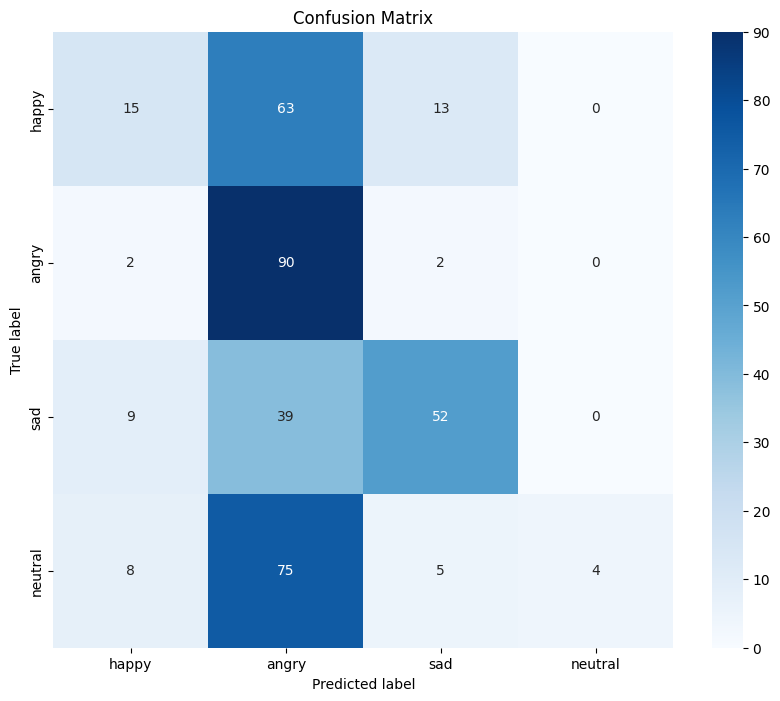

In [ ]:
y_true = []
y_pred = []

for _, row in tqdm(df_emoUERJ.iterrows(), total=df_emoUERJ.shape[0]):
    audio_path = row['file']
    true_emotion = row['emotion']
    predicted_emotion = infer(audio_path)

    y_true.append(true_emotion)
    y_pred.append(predicted_emotion)


emouerj_emotions = ['happy', 'angry', 'sad', 'neutral']
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=emouerj_emotions))


f1 = f1_score(y_true, y_pred, average='weighted', labels=emouerj_emotions)
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_true, y_pred, labels=emouerj_emotions)
plot_confusion_matrix(cm, classes=emouerj_emotions)